<a href="https://colab.research.google.com/github/furkanaydinn/Transfer-Learning/blob/main/Transfer_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATANIN COLAB ORTAMINA INDIRILMESI***

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-27 12:19:51--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.72.44.156, 2600:1417:3f:1291::317f, 2600:1417:3f:128f::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.72.44.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M  37.6MB/s    in 15s     

utime(kagglecatsanddogs_5340.zip.1): No such file or directory
2022-08-27 12:20:06 (52.4 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



*italik **kalın metin** metin*

# ***DATANIN UNZIP EDILMESI***

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

# ***GEREKLI KÜTÜPHANELERİN YÜKLENMESİ***

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings("ignore")


# ***Data Frame***

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
      if class_name == 'Cat':
         label.append(0)
      else:
        label.append(1)
      input_path.append(os.path.join("PetImages",class_name , path))
print(input_path[0],label[0])

PetImages/Dog/7927.jpg 1


In [ ]:

df=pd.DataFrame()
df['images'] = input_path
df['label'] = label
df= df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/8152.jpg      0
1  PetImages/Cat/11204.jpg      0
2   PetImages/Cat/7931.jpg      0
3  PetImages/Cat/11152.jpg      0
4  PetImages/Cat/12318.jpg      0

In [ ]:
#delete data db.files
for i in df["images"]:
  if '.jpg' not in i:
    print(i)


PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg']

In [ ]:
df= df[df['images'] !='PetImages/Cat/Thumbs.db']
df= df[df['images'] !='PetImages/Dog/Thumbs.db']
df= df[df['images'] !='PetImages/Dog/11702.jpg']
df= df[df['images'] !='PetImages/Cat/666.jpg']
len(df)

24998

# ***Keşifsel Veri Analizi***

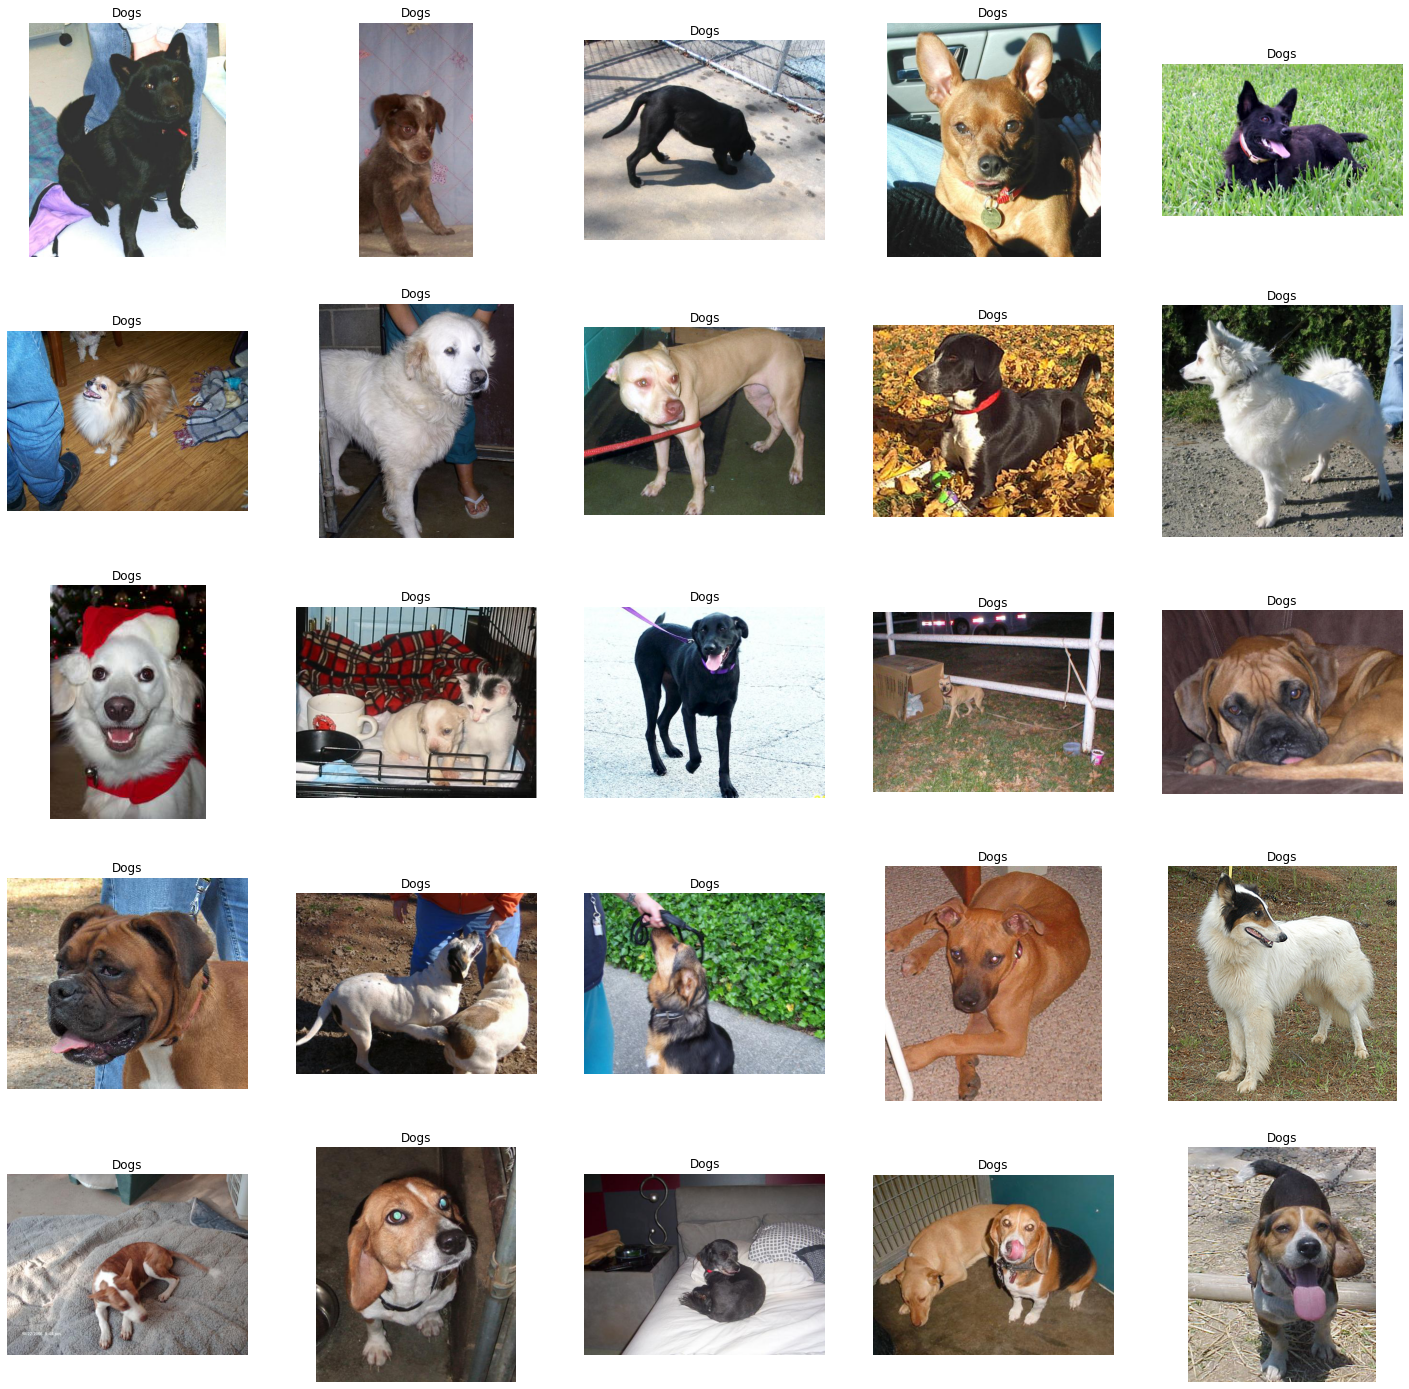

In [ ]:
plt.figure(figsize=(25,25))
temp= df[df['label']==1]['images']
start = random.randint(0,len(temp))
files= temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Dogs")
  plt.axis("off")

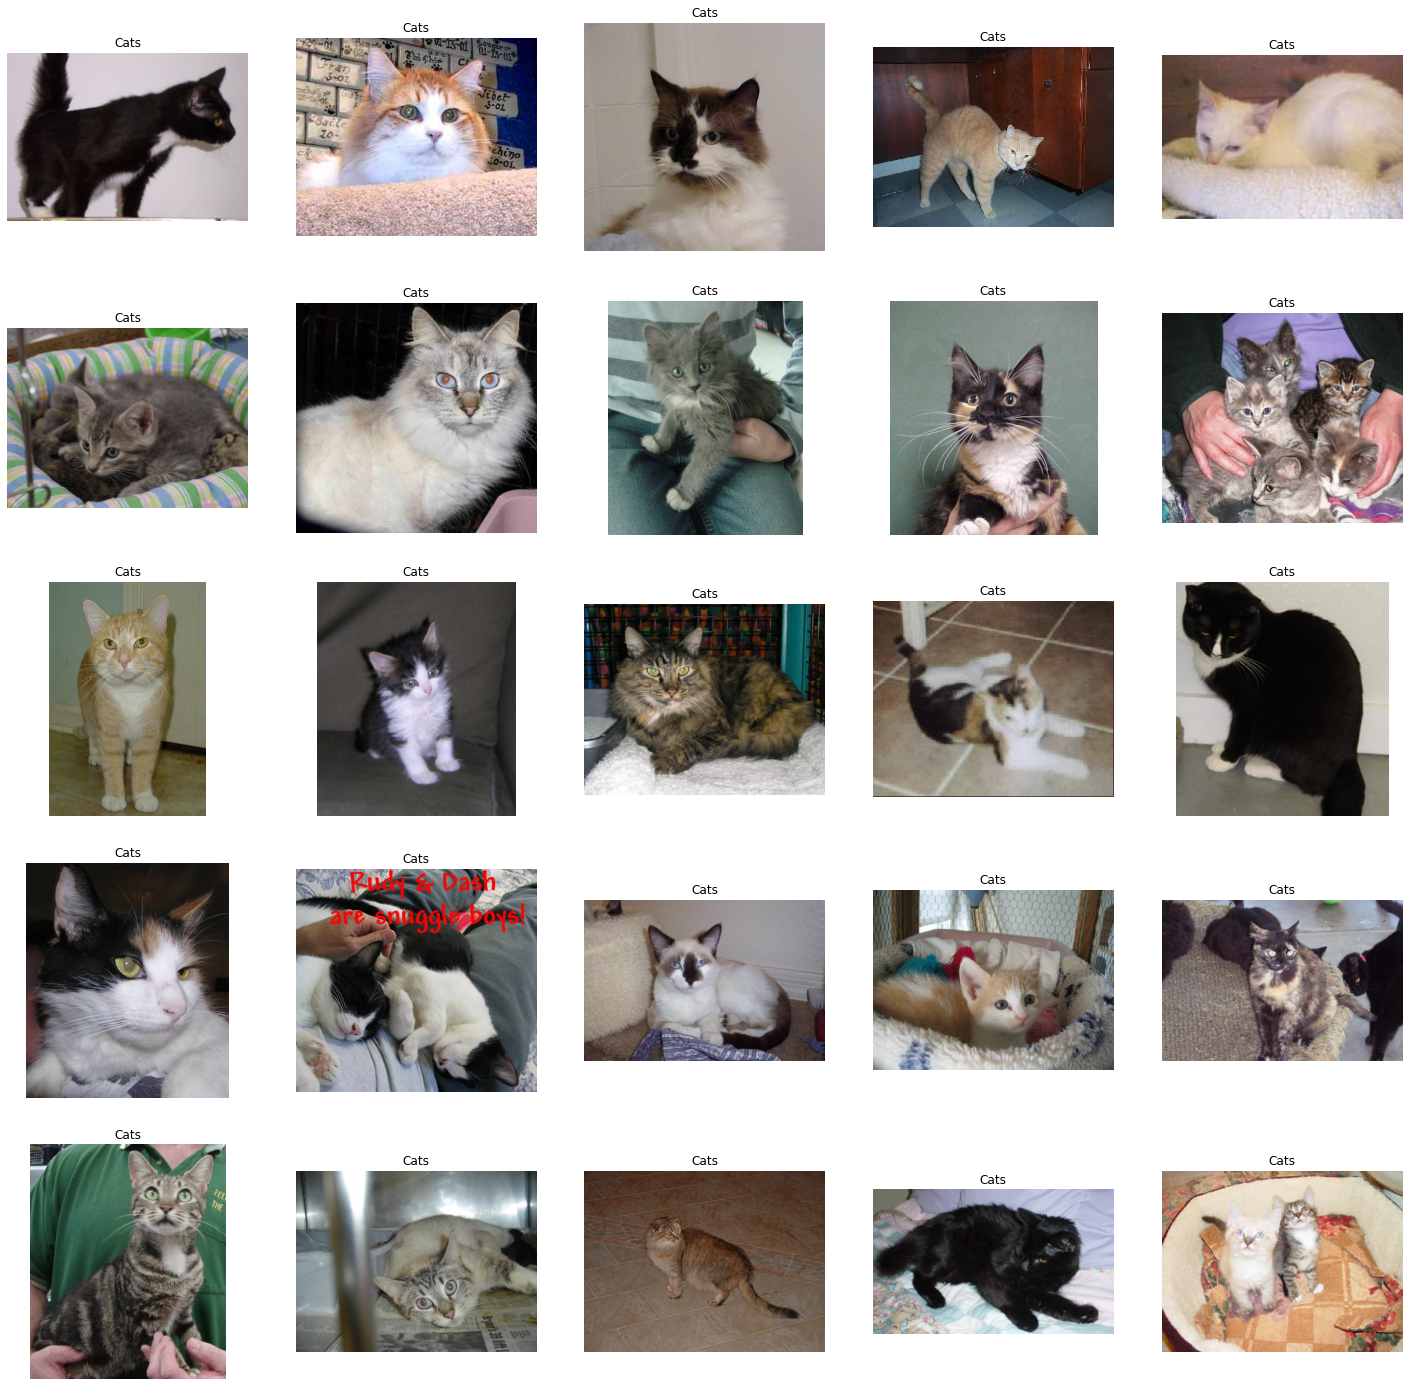

In [ ]:
plt.figure(figsize=(25,25))
temp= df[df['label']==0]['images']
start = random.randint(0,len(temp))
files= temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Cats")
  plt.axis("off")

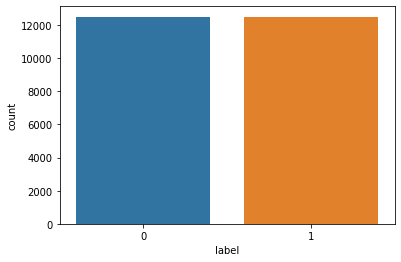

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df["label"] = df["label"].astype('str')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# ***Modelin Kurulmasi***

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 131s 3s/step - loss: 0.7523 - accuracy: 0.5381 - val_loss: 0.6643 - val_accuracy: 0.5706
Epoch 2/10
40/40 [==============================] - 128s 3s/step - loss: 0.6434 - accuracy: 0.6367 - val_loss: 0.5885 - val_accuracy: 0.6872
Epoch 3/10
40/40 [==============================] - 127s 3s/step - loss: 0.6001 - accuracy: 0.6773 - val_loss: 0.5496 - val_accuracy: 0.7202
Epoch 4/10
40/40 [==============================] - 127s 3s/step - loss: 0.5678 - accuracy: 0.7055 - val_loss: 0.5409 - val_accuracy: 0.7300
Epoch 5/10
40/40 [==============================] - 129s 3s/step - loss: 0.5379 - accuracy: 0.7318 - val_loss: 0.5049 - val_accuracy: 0.7532
Epoch 6/10
40/40 [==============================] - 128s 3s/step - loss: 0.5261 - accuracy: 0.7392 - val_loss: 0.5042 - val_accuracy: 0.7420
Epoch 7/10
40/40 [==============================] - 128s 3s/step - loss: 0.5110 - accuracy: 0.7499 - val_loss: 0.4918 - val_accuracy: 0.7556
Epoch 8/10
40

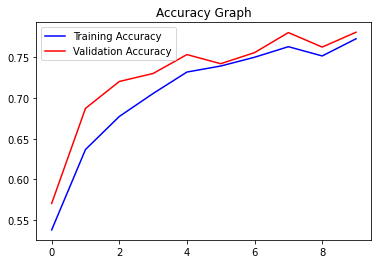

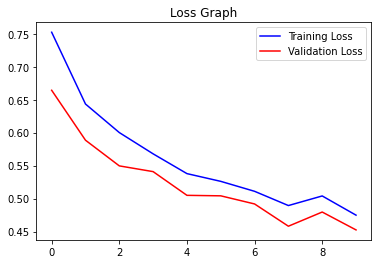

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()